# **REDES NEURAIS ARTIFICIAIS: CLASSIFICAÇÃO**

Este projeto tem por objetivo desenvolver um algoritmo de Machine Learning para prever a tendência de uma pessoa desenvolver algum tipo de doença cardíaca com base em alguns fatores clínicos e laboratoriais. 

Os dados foram extraídos do site do Kaggle:

https://www.kaggle.com/fedesoriano/heart-failure-prediction/version/1

In [465]:
import numpy as np
import pandas as pd

In [466]:
df = pd.read_csv('Dados/heart_tratado.csv',
                    sep=';', encoding='iso-8859-1')

In [467]:
df.head()

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140,289.0,0,Normal,172,N,0.0,Up,0
1,49,F,NAP,160,180.0,0,Normal,156,N,1.0,Flat,1
2,37,M,ATA,130,283.0,0,ST,98,N,0.0,Up,0
3,48,F,ASY,138,214.0,0,Normal,108,Y,1.5,Flat,1
4,54,M,NAP,150,195.0,0,Normal,122,N,0.0,Up,0


## **LEGENDA**

Age = idade (anos)

Sex = sexo (0=M; 1=F)

Chest Pain Type = tipo de dor no peito (0=TA:angina típica; 1=ATA:angina atípica; 2=NAP:dor não anginosa; 3=ASY:assintomático)

Resting BP = pressão sanguínea em repouso (mmHg)

Cholesterol = colesterol sérico (mg/dl)

Fasting BS = açúcar no sangue em jejum (mg/dl)
          0: Fasting BS < 120 mg/dl (não diabético)
          1: Fasting BS >= 120 mg/dl, (diabético)

Resting ECG = eletrocardiograma em repouso (0=Normal; 1=ST:Anormalidade da onda ST-T; 2=LVH: Hipertrofia ventricular esquerda)

Max HR = frequência cardíaca máxima

Exercise Angina = Angina induzida por exercício (0=Não; 1=Sim)

Old Peak = Depressão de ST induzida por exercício em relação ao repouso

ST_Slope = Inclinação do segmento ST (0=UP; 1=Flat; 2=Down)

Heart Disease = Doença cardíaca (0=Não possui doença cardíaca; 1=Possui doença cardíaca)



In [468]:
df.shape

(917, 12)

**Resultados**

Naive Bayes = 84,78% (treino e teste) - 234 acertos e 85,17% (validação cruzada) : previsores3_esc

SVM = 86,23% - 238 acertos e 85,72% (validação cruzada) : previsores3-esc - SVC(kernel='rbf', random_state=1, C = 2)

Regressão logística = 86,23% - 238 acertos e 85,83% (validação cruzada) : previsores3_esc - LogisticRegression(random_state=1, max_iter=600, penalty="l2", tol=0.0001, C=1,solver="lbfgs")

KNN = 84,06% - 232 acertos e 85,84% (validação cruzada) : previsores3_esc ou previsores_esc - KNeighborsClassifier(n_neighbors=7, metric='minkowski', p = 1)

Árvore de decisão = 83,7% (treino e teste) - 231 acertos e 83,32% (validação cruzada): previsores3_esc - DecisionTreeClassifier(criterion='entropy', random_state = 0, max_depth=3)

Random Forest = 86,59% - 239 acertos e 85,92% (validação cruzada) : previsores - RandomForestClassifier(n_estimators=150, criterion='entropy', random_state = 0, max_depth=4)

**XGboost = 87,68% - 242 acertos e 87,13% (validação cruzada) : previsores - XGBClassifier(max_depth=2, learning_rate=0.05, n_estimators=250, objective='binary:logistic', random_state=3)**

LightGBM = 86,23% (treino e teste)- 238 acertos e 85,93% (validação cruzada) : previsores - lgb.LGBMClassifier(num_leaves = 250, objective = 'binary',  max_depth = 2, learning_rate = .05, max_bin =100)

CatBoost = 86,96% (treino e teste) previsores4 - 240 acertos e 88% (validação cruzada com previsores) - CatBoostClassifier(task_type='CPU', iterations=100, learning_rate=0.1, depth = 8, random_state = 5, eval_metric="Accuracy")

## **Transformando as classes strings em variáveis categóricas ordinais**

In [469]:
df2 = pd.DataFrame.copy(df)

In [470]:
df2['Sex'].replace({'M':0, 'F': 1}, inplace=True)
df2['ChestPainType'].replace({'TA':0, 'ATA': 1, 'NAP':2, 'ASY': 3}, inplace=True)
df2['RestingECG'].replace({'Normal':0, 'ST': 1, 'LVH':2}, inplace=True)
df2['ExerciseAngina'].replace({'N':0, 'Y': 1}, inplace=True)
df2['ST_Slope'].replace({'Up':0, 'Flat': 1, 'Down':2}, inplace=True)

In [471]:
df2.head()

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,0,1,140,289.0,0,0,172,0,0.0,0,0
1,49,1,2,160,180.0,0,0,156,0,1.0,1,1
2,37,0,1,130,283.0,0,1,98,0,0.0,0,0
3,48,1,3,138,214.0,0,0,108,1,1.5,1,1
4,54,0,2,150,195.0,0,0,122,0,0.0,0,0


In [472]:
df2.dtypes

Age                 int64
Sex                 int64
ChestPainType       int64
RestingBP           int64
Cholesterol       float64
FastingBS           int64
RestingECG          int64
MaxHR               int64
ExerciseAngina      int64
Oldpeak           float64
ST_Slope            int64
HeartDisease        int64
dtype: object

In [473]:
df2.shape

(917, 12)

## **ATRIBUTOS PREVISORES E ALVO**

In [503]:
previsores = df2.iloc[:, 0:11].values


In [504]:
previsores

array([[40. ,  0. ,  1. , ...,  0. ,  0. ,  0. ],
       [49. ,  1. ,  2. , ...,  0. ,  1. ,  1. ],
       [37. ,  0. ,  1. , ...,  0. ,  0. ,  0. ],
       ...,
       [57. ,  0. ,  3. , ...,  1. ,  1.2,  1. ],
       [57. ,  1. ,  1. , ...,  0. ,  0. ,  1. ],
       [38. ,  0. ,  2. , ...,  0. ,  0. ,  0. ]])

In [476]:
previsores

array([[  1. , 140. , 289. , ...,   0. ,   0. ,   0. ],
       [  2. , 160. , 180. , ...,   1. ,   1. ,   1. ],
       [  1. , 130. , 283. , ...,   0. ,   0. ,   0. ],
       ...,
       [  3. , 130. , 131. , ...,   1.2,   1. ,   1. ],
       [  1. , 130. , 236. , ...,   0. ,   1. ,   1. ],
       [  2. , 138. , 175. , ...,   0. ,   0. ,   0. ]])

In [477]:
previsores.shape

(917, 10)

In [478]:
alvo = df.iloc[:, 11].values

In [479]:
alvo

array([0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0,
       1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0,
       0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 1, 1, 0,
       1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1,
       1, 1, 0, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 1, 1, 0, 1, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1,
       1, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0,
       1, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 1,
       1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1,
       1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1,

In [480]:
alvo.shape

(917,)

## **Análise das escalas dos atributos (Escalonamento)**

In [481]:
df2.describe()

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
count,917.000000,917.000000,917.000000,917.000000,917.000000,917.000000,917.000000,917.000000,917.000000,917.000000,917.00000,917.000000
mean,53.509269,0.210469,2.251908,132.540894,244.635389,0.233370,0.604144,136.789531,0.404580,0.886696,0.63795,0.552890
std,9.437636,0.407864,0.931502,17.999749,53.347125,0.423206,0.806161,25.467129,0.491078,1.066960,0.60727,0.497466
min,28.000000,0.000000,0.000000,80.000000,85.000000,0.000000,0.000000,60.000000,0.000000,-2.600000,0.00000,0.000000
25%,47.000000,0.000000,2.000000,120.000000,214.000000,0.000000,0.000000,120.000000,0.000000,0.000000,0.00000,0.000000
50%,54.000000,0.000000,3.000000,130.000000,244.635389,0.000000,0.000000,138.000000,0.000000,0.600000,1.00000,1.000000
75%,60.000000,0.000000,3.000000,140.000000,267.000000,0.000000,1.000000,156.000000,1.000000,1.500000,1.00000,1.000000
max,77.000000,1.000000,3.000000,200.000000,603.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.00000,1.000000


Padronização (utiliza a média e o desvio padrão como referência).

Normalização (utiliza os valores máximo e mínimo como referência).

In [482]:
from sklearn.preprocessing import StandardScaler

In [483]:
previsores_esc = StandardScaler().fit_transform(previsores) #Esc de escalonado

In [484]:
previsores_esc

array([[-1.34470119,  0.41462669,  0.83207523, ..., -0.83150225,
        -1.05109458, -1.1120186 ],
       [-0.27058012,  1.52635965, -1.2122614 , ...,  0.10625149,
         0.59651863,  0.89926553],
       [-1.34470119, -0.14123979,  0.71954294, ..., -0.83150225,
        -1.05109458, -1.1120186 ],
       ...,
       [ 0.80354095, -0.14123979, -2.13127511, ...,  0.29380223,
         0.59651863,  0.89926553],
       [-1.34470119, -0.14123979, -0.16196001, ..., -0.83150225,
         0.59651863,  0.89926553],
       [-0.27058012,  0.30345339, -1.30603831, ..., -0.83150225,
        -1.05109458, -1.1120186 ]])

In [485]:
previsoresdf = pd.DataFrame(previsores_esc)
previsoresdf

,0,1,2,3,4,5,6,7,8,9
0,-1.344701,0.414627,0.832075,-0.551733,-0.749818,1.383339,-0.824310,-0.831502,-1.051095,-1.112019
1,-0.270580,1.526360,-1.212261,-0.551733,-0.749818,0.754736,-0.824310,0.106251,0.596519,0.899266
2,-1.344701,-0.141240,0.719543,-0.551733,0.491306,-1.523953,-0.824310,-0.831502,-1.051095,-1.112019
3,0.803541,0.303453,-0.574578,-0.551733,-0.749818,-1.131075,1.213136,0.575128,0.596519,0.899266
4,-0.270580,0.970493,-0.930931,-0.551733,-0.749818,-0.581047,-0.824310,-0.831502,-1.051095,-1.112019
...,...,...,...,...,...,...,...,...,...,...
912,-2.418822,-1.252973,0.363191,-0.551733,-0.749818,-0.188170,-0.824310,0.293802,0.596519,0.899266
913,0.803541,0.636973,-0.968441,1.812470,-0.749818,0.165420,-0.824310,2.356860,0.596519,0.899266
914,0.803541,-0.141240,-2.131275,-0.551733,-0.749818,-0.856061,1.213136,0.293802,0.596519,0.899266
915,-1.344701,-0.141240,-0.161960,-0.551733,1.732430,1.461915,-0.824310,-0.831502,0.596519,0.899266


In [486]:
previsoresdf.describe()

,0,1,2,3,4,5,6,7,8,9
count,9.170000e+02,9.170000e+02,9.170000e+02,9.170000e+02,917.000000,9.170000e+02,9.170000e+02,9.170000e+02,9.170000e+02,9.170000e+02
mean,1.046055e-16,7.767929e-16,-1.869340e-16,4.649135e-17,0.000000,-5.114048e-16,-1.046055e-16,7.748558e-17,-3.874279e-17,3.099423e-17
std,1.000546e+00,1.000546e+00,1.000546e+00,1.000546e+00,1.000546,1.000546e+00,1.000546e+00,1.000546e+00,1.000546e+00,1.000546e+00
min,-2.418822e+00,-2.920572e+00,-2.994023e+00,-5.517333e-01,-0.749818,-3.016886e+00,-8.243101e-01,-3.269662e+00,-1.051095e+00,-1.112019e+00
25%,-2.705801e-01,-6.971063e-01,-5.745784e-01,-5.517333e-01,-0.749818,-6.596226e-01,-8.243101e-01,-8.315022e-01,-1.051095e+00,-1.112019e+00
50%,8.035410e-01,-1.412398e-01,0.000000e+00,-5.517333e-01,-0.749818,4.755658e-02,-8.243101e-01,-2.688500e-01,5.965186e-01,8.992655e-01
75%,8.035410e-01,4.146267e-01,4.194568e-01,-5.517333e-01,0.491306,7.547357e-01,1.213136e+00,5.751284e-01,5.965186e-01,8.992655e-01
max,8.035410e-01,3.749826e+00,6.721265e+00,1.812470e+00,1.732430,2.561971e+00,1.213136e+00,4.982571e+00,2.244132e+00,8.992655e-01


## **Codificação de variáveis categóricas**

### **LabelEncoder: transformação de variáveis categóricas em numéricas**


In [487]:
from sklearn.preprocessing import LabelEncoder

In [488]:
df.head()

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140,289.0,0,Normal,172,N,0.0,Up,0
1,49,F,NAP,160,180.0,0,Normal,156,N,1.0,Flat,1
2,37,M,ATA,130,283.0,0,ST,98,N,0.0,Up,0
3,48,F,ASY,138,214.0,0,Normal,108,Y,1.5,Flat,1
4,54,M,NAP,150,195.0,0,Normal,122,N,0.0,Up,0


In [489]:
previsores2 = df.iloc[:, 0:11].values
previsores2

array([[40, 'M', 'ATA', ..., 'N', 0.0, 'Up'],
       [49, 'F', 'NAP', ..., 'N', 1.0, 'Flat'],
       [37, 'M', 'ATA', ..., 'N', 0.0, 'Up'],
       ...,
       [57, 'M', 'ASY', ..., 'Y', 1.2, 'Flat'],
       [57, 'F', 'ATA', ..., 'N', 0.0, 'Flat'],
       [38, 'M', 'NAP', ..., 'N', 0.0, 'Up']], dtype=object)

In [490]:
previsores2[:,1] = LabelEncoder().fit_transform(previsores[:,1])

In [491]:
previsores2

array([[40, 40, 'ATA', ..., 'N', 0.0, 'Up'],
       [49, 54, 'NAP', ..., 'N', 1.0, 'Flat'],
       [37, 30, 'ATA', ..., 'N', 0.0, 'Up'],
       ...,
       [57, 30, 'ASY', ..., 'Y', 1.2, 'Flat'],
       [57, 30, 'ATA', ..., 'N', 0.0, 'Flat'],
       [38, 38, 'NAP', ..., 'N', 0.0, 'Up']], dtype=object)

In [492]:
previsores2[:,2] = LabelEncoder().fit_transform(previsores2[:,2])
previsores2[:,6] = LabelEncoder().fit_transform(previsores2[:,6])
previsores2[:,8] = LabelEncoder().fit_transform(previsores2[:,8])
previsores2[:,10] = LabelEncoder().fit_transform(previsores2[:,10])

In [493]:
previsores2

array([[40, 40, 1, ..., 0, 0.0, 2],
       [49, 54, 2, ..., 0, 1.0, 1],
       [37, 30, 1, ..., 0, 0.0, 2],
       ...,
       [57, 30, 0, ..., 1, 1.2, 1],
       [57, 30, 1, ..., 0, 0.0, 1],
       [38, 38, 2, ..., 0, 0.0, 2]], dtype=object)

In [494]:
previsores2.shape

(917, 11)

### **OneHotEncoder: Criação de variáveis Dummy (fictícia).criando variaveis ficticiais**

Cuidado com a multicolinearidade (variáveis altamente correlacionadas entre si).

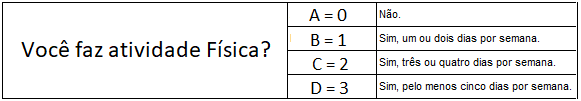

A   B   C   D   
1   0   0   0   
0   1   0   0   
0   0   1   0   
0   0   0   1


In [495]:
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer

In [496]:
previsores3 = ColumnTransformer(transformers=[('OneHot', OneHotEncoder(), [1,2,6,8,10])],
                                remainder='passthrough').fit_transform(previsores2)

In [497]:
previsores3

<917x84 sparse matrix of type '<class 'numpy.float64'>'
	with 9016 stored elements in Compressed Sparse Row format>

In [498]:
previsores3.shape

(917, 84)

In [499]:
previsores3df = pd.DataFrame(previsores3)
previsores3df.head()

,0
0,"(0, 40)\t1.0\n (0, 67)\t1.0\n (0, 71)\t1.0..."
1,"(0, 54)\t1.0\n (0, 68)\t1.0\n (0, 71)\t1.0..."
2,"(0, 30)\t1.0\n (0, 67)\t1.0\n (0, 72)\t1.0..."
3,"(0, 38)\t1.0\n (0, 66)\t1.0\n (0, 71)\t1.0..."
4,"(0, 48)\t1.0\n (0, 68)\t1.0\n (0, 71)\t1.0..."


In [500]:
df.head()

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140,289.0,0,Normal,172,N,0.0,Up,0
1,49,F,NAP,160,180.0,0,Normal,156,N,1.0,Flat,1
2,37,M,ATA,130,283.0,0,ST,98,N,0.0,Up,0
3,48,F,ASY,138,214.0,0,Normal,108,Y,1.5,Flat,1
4,54,M,NAP,150,195.0,0,Normal,122,N,0.0,Up,0


## **Escalonamento**

In [501]:
from sklearn.preprocessing import StandardScaler

In [502]:
previsores3_esc = StandardScaler().fit_transform(previsores3)

ValueError: Cannot center sparse matrices: pass `with_mean=False` instead. See docstring for motivation and alternatives.

In [ ]:
previsores3_esc

array([[ 0.51630861, -0.51630861, -1.08542493, ..., -0.55173333,
         1.38333943, -0.83150225],
       [-1.9368261 ,  1.9368261 , -1.08542493, ..., -0.55173333,
         0.75473573,  0.10625149],
       [ 0.51630861, -0.51630861, -1.08542493, ..., -0.55173333,
        -1.52395266, -0.83150225],
       ...,
       [ 0.51630861, -0.51630861,  0.92129817, ..., -0.55173333,
        -0.85606123,  0.29380223],
       [-1.9368261 ,  1.9368261 , -1.08542493, ..., -0.55173333,
         1.46191489, -0.83150225],
       [ 0.51630861, -0.51630861, -1.08542493, ..., -0.55173333,
         1.42262716, -0.83150225]])

In [ ]:
previsores3df = pd.DataFrame(previsores3_esc)
previsores3df

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19
0,0.516309,-0.516309,-1.085425,2.073784,-0.531524,-0.229810,-0.507826,0.815013,-0.490781,0.824310,-0.824310,-0.271607,-1.001091,1.149573,-1.432206,0.414627,0.832075,-0.551733,1.383339,-0.831502
1,-1.936826,1.936826,-1.085425,-0.482210,1.881384,-0.229810,-0.507826,0.815013,-0.490781,0.824310,-0.824310,-0.271607,0.998910,-0.869888,-0.478057,1.526360,-1.212261,-0.551733,0.754736,0.106251
2,0.516309,-0.516309,-1.085425,2.073784,-0.531524,-0.229810,-0.507826,-1.226974,2.037569,0.824310,-0.824310,-0.271607,-1.001091,1.149573,-1.750256,-0.141240,0.719543,-0.551733,-1.523953,-0.831502
3,-1.936826,1.936826,0.921298,-0.482210,-0.531524,-0.229810,-0.507826,0.815013,-0.490781,-1.213136,1.213136,-0.271607,0.998910,-0.869888,-0.584074,0.303453,-0.574578,-0.551733,-1.131075,0.575128
4,0.516309,-0.516309,-1.085425,-0.482210,1.881384,-0.229810,-0.507826,0.815013,-0.490781,0.824310,-0.824310,-0.271607,-1.001091,1.149573,0.052026,0.970493,-0.930931,-0.551733,-0.581047,-0.831502
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
912,0.516309,-0.516309,-1.085425,-0.482210,-0.531524,4.351412,-0.507826,0.815013,-0.490781,0.824310,-0.824310,-0.271607,0.998910,-0.869888,-0.902124,-1.252973,0.363191,-0.551733,-0.188170,0.293802
913,0.516309,-0.516309,0.921298,-0.482210,-0.531524,-0.229810,-0.507826,0.815013,-0.490781,0.824310,-0.824310,-0.271607,0.998910,-0.869888,1.536257,0.636973,-0.968441,1.812470,0.165420,2.356860
914,0.516309,-0.516309,0.921298,-0.482210,-0.531524,-0.229810,-0.507826,0.815013,-0.490781,-1.213136,1.213136,-0.271607,0.998910,-0.869888,0.370075,-0.141240,-2.131275,-0.551733,-0.856061,0.293802
915,-1.936826,1.936826,-1.085425,2.073784,-0.531524,-0.229810,1.969177,-1.226974,-0.490781,0.824310,-0.824310,-0.271607,0.998910,-0.869888,0.370075,-0.141240,-0.161960,-0.551733,1.461915,-0.831502


In [ ]:
previsores3df.describe()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19
count,9.170000e+02,9.170000e+02,9.170000e+02,9.170000e+02,9.170000e+02,9.170000e+02,917.000000,9.170000e+02,9.170000e+02,9.170000e+02,9.170000e+02,9.170000e+02,917.000000,9.170000e+02,9.170000e+02,9.170000e+02,9.170000e+02,9.170000e+02,9.170000e+02,9.170000e+02
mean,-1.472226e-16,1.084798e-16,1.937139e-17,-3.874279e-17,3.874279e-17,6.973702e-17,0.000000,-9.298269e-17,1.549712e-17,-4.261707e-17,4.261707e-17,8.523413e-17,0.000000,-3.874279e-17,1.859654e-16,7.884157e-16,3.014189e-15,-1.549712e-17,-5.114048e-16,-1.859654e-16
std,1.000546e+00,1.000546e+00,1.000546e+00,1.000546e+00,1.000546e+00,1.000546e+00,1.000546,1.000546e+00,1.000546e+00,1.000546e+00,1.000546e+00,1.000546e+00,1.000546,1.000546e+00,1.000546e+00,1.000546e+00,1.000546e+00,1.000546e+00,1.000546e+00,1.000546e+00
min,-1.936826e+00,-5.163086e-01,-1.085425e+00,-4.822104e-01,-5.315237e-01,-2.298105e-01,-0.507826,-1.226974e+00,-4.907810e-01,-1.213136e+00,-8.243101e-01,-2.716072e-01,-1.001091,-8.698879e-01,-2.704405e+00,-2.920572e+00,-2.994023e+00,-5.517333e-01,-3.016886e+00,-3.269662e+00
25%,5.163086e-01,-5.163086e-01,-1.085425e+00,-4.822104e-01,-5.315237e-01,-2.298105e-01,-0.507826,-1.226974e+00,-4.907810e-01,-1.213136e+00,-8.243101e-01,-2.716072e-01,-1.001091,-8.698879e-01,-6.900904e-01,-6.971063e-01,-5.745784e-01,-5.517333e-01,-6.596226e-01,-8.315022e-01
50%,5.163086e-01,-5.163086e-01,9.212982e-01,-4.822104e-01,-5.315237e-01,-2.298105e-01,-0.507826,8.150134e-01,-4.907810e-01,8.243101e-01,-8.243101e-01,-2.716072e-01,0.998910,-8.698879e-01,5.202558e-02,-1.412398e-01,3.198360e-15,-5.517333e-01,4.755658e-02,-2.688500e-01
75%,5.163086e-01,-5.163086e-01,9.212982e-01,-4.822104e-01,-5.315237e-01,-2.298105e-01,-0.507826,8.150134e-01,-4.907810e-01,8.243101e-01,1.213136e+00,-2.716072e-01,0.998910,1.149573e+00,6.881250e-01,4.146267e-01,4.194568e-01,-5.517333e-01,7.547357e-01,5.751284e-01
max,5.163086e-01,1.936826e+00,9.212982e-01,2.073784e+00,1.881384e+00,4.351412e+00,1.969177,8.150134e-01,2.037569e+00,8.243101e-01,1.213136e+00,3.681787e+00,0.998910,1.149573e+00,2.490407e+00,3.749826e+00,6.721265e+00,1.812470e+00,2.561971e+00,4.982571e+00


## **RESUMO PRÉ-PROCESSAMENTO**

alvo = variável que se pretende atingir (tem ou não doença cardíaca).

previsores = conjunto de variáveis previsoras com as variáveis categóricas transformadas em numéricas manualmente, sem escalonar.

previsores_esc = conjunto de variáveis previsoras com as variáveis categóricas transformadas em numéricas, escalonada.

previsores2 = conjunto de variáveis previsoras com as variáveis categóricas transformadas em numéricas pelo labelencoder.

previsores3 = conjunto de variáveis previsoras transformadas pelo labelencoder e onehotencoder, sem escalonar.

previsores3_esc = conjunto de variáveis previsoras transformadas pelo labelencoder e onehotencoder escalonada.

## **BASE DE TREINO E TESTE**

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
x_treino, x_teste, y_treino, y_teste = train_test_split(previsores_esc, alvo, test_size = 0.3, random_state = 0)

In [ ]:
x_treino.shape

(641, 11)

In [ ]:
x_teste.shape

(276, 11)

In [ ]:
y_treino.shape

(641,)

In [ ]:
y_teste.shape

(276,)

# **CRIAÇÃO DO ALGORITMO**

In [ ]:
from sklearn.neural_network import MLPClassifier

In [ ]:
MLPClassifier?

Init signature:
MLPClassifier(
    hidden_layer_sizes=(100,),
    activation='relu',
    *,
    solver='adam',
    alpha=0.0001,
    batch_size='auto',
    learning_rate='constant',
    learning_rate_init=0.001,
    power_t=0.5,
    max_iter=200,
    shuffle=True,
    random_state=None,
    tol=0.0001,
    verbose=False,
    warm_start=False,
    momentum=0.9,
    nesterovs_momentum=True,
    early_stopping=False,
    validation_fraction=0.1,
    beta_1=0.9,
    beta_2=0.999,
    epsilon=1e-08,
    n_iter_no_change=10,
    max_fun=15000,
)
Docstring:     
Multi-layer Perceptron classifier.

This model optimizes the log-loss function using LBFGS or stochastic
gradient descent.

.. versionadded:: 0.18

Parameters
----------
hidden_layer_sizes : array-like of shape(n_layers - 2,), default=(100,)
    The ith element represents the number of neurons in the ith
    hidden layer.

activation : {'identity', 'logistic', 'tanh', 'relu'}, default='relu'
    Activation function for the hidden laye

Parâmetros MLPClassifier   
- hidden_layer_sizes (camadas escondidas): default (100,)   

  Quant.= (Ne+Ns)/2 = (11+1)/2 = 6 neurônios   
  Quant.=2/3.(Ne) + Ns = 2/3.11+1 = 8 neurônios
- activation: Função de ativação default='relu' 
- solver: algoritmo matemático. Default='adam' (datasets grandes = acima de 1000 amostras). lbfgs é para datasets pequenos. sgd é com a descida do gradiente estocástico (recomendado testar).
- alpha:  parâmetro para o termo de regularização de ajuste de pesos. Aumento de alpha estimula pesos menores e diminuição de alpha estimula pesos maiores. Default=0.0001.
- batch_size: tamanho dos mini lotes. default=min(200, n_samples). Não usar com o solver lbfgs.
- learning_rate: taxa de aprendizagem. default='constant'. Três tipos:   
  1- 'constant':uma taxa de aprendizado constante dada pela taxa de aprendizagem inicial.   
  2- 'invscaling': diminui gradualmente por: taxa efetiva = taxa inicial / t^power_t  
  3- 'adaptive': a taxa é dividida por 5 cada vez que em duas épocas consecutivas não diminuir o erro.
- learning_rate_init: taxa de aprendizagem inicial. Default=0.001
- max_iter int: Número máximo de iterações. default = 200.  ('sgd', 'adam').
- max_fun: Número máximo de chamadas de função de perda. Para 'lbfgs'. Default: 15000
- shuffle: default = True
Usado apenas quando solver = 'sgd' ou 'adam'.
- random_state: default = None
- tol:Tolerância para a otimização.Default=0.0001
- momentum: otimização do algoritmo 'sgd'. Default: 0.9.
- n_iter_no_change: Número máximo de épocas que não atinge a tolerância de melhoria. default = 10. Apenas para solver = 'sgd' ou 'adam'
- verbose : Mostra o progresso. default=False.



In [ ]:
redes = MLPClassifier(hidden_layer_sizes=(7), activation='relu', solver='adam', max_iter =1200, #Para ter duas camadas ocultas em hidden_layer_sizes? Basta colocar (7,7).
                              tol=0.0001, random_state = 12, verbose = True)

In [ ]:
redes.fit(x_treino, y_treino)

Iteration 1, loss = 0.82213876
Iteration 2, loss = 0.81028197
Iteration 3, loss = 0.79947174
Iteration 4, loss = 0.78857257
Iteration 5, loss = 0.77822671
Iteration 6, loss = 0.76823947
Iteration 7, loss = 0.75865023
Iteration 8, loss = 0.74923211
Iteration 9, loss = 0.74022536
Iteration 10, loss = 0.73169893
Iteration 11, loss = 0.72328098
Iteration 12, loss = 0.71525160
Iteration 13, loss = 0.70741798
Iteration 14, loss = 0.70013311
Iteration 15, loss = 0.69274830
Iteration 16, loss = 0.68543823
Iteration 17, loss = 0.67841288
Iteration 18, loss = 0.67110371
Iteration 19, loss = 0.66430044
Iteration 20, loss = 0.65759374
Iteration 21, loss = 0.65089212
Iteration 22, loss = 0.64431943
Iteration 23, loss = 0.63810089
Iteration 24, loss = 0.63199918
Iteration 25, loss = 0.62604922
Iteration 26, loss = 0.61993331
Iteration 27, loss = 0.61402521
Iteration 28, loss = 0.60811901
Iteration 29, loss = 0.60227607
Iteration 30, loss = 0.59614494
Iteration 31, loss = 0.59029431
Iteration 32, los

MLPClassifier(hidden_layer_sizes=7, max_iter=1200, random_state=12,
              verbose=True)

In [ ]:
previsoes = redes.predict(x_teste)

In [ ]:
previsoes

array([1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1,
       1, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1,
       1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 1,
       1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1,
       1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1,
       1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 0, 1,
       1, 1, 0, 1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0,
       1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 0, 1, 0, 1, 1, 0, 0, 1, 1,
       1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 0,
       1, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 1,
       1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 0,
       1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0,
       1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 1, 1], dtype=int64)

In [ ]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

In [ ]:
print("Acurácia: %.2f%%" % (accuracy_score(y_teste, previsoes) * 100.0))

Acurácia: 86.59%


In [ ]:
confusion_matrix(y_teste, previsoes)

array([[101,  20],
       [ 17, 138]], dtype=int64)

In [ ]:
print(classification_report(y_teste, previsoes))

              precision    recall  f1-score   support

           0       0.86      0.83      0.85       121
           1       0.87      0.89      0.88       155

    accuracy                           0.87       276
   macro avg       0.86      0.86      0.86       276
weighted avg       0.87      0.87      0.87       276



**Análise dados de treino**

In [ ]:
previsoes_treino = redes.predict(x_treino)
previsoes_treino

array([1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1,
       1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0,
       1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1,
       0, 1, 1, 0, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1,
       1, 1, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 0, 1,
       0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 0,
       1, 1, 0, 0, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 0, 1, 0,
       1, 0, 1, 1, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0,
       0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1,
       1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 0, 0, 1,
       1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 0, 1, 0,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0,
       1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 1, 1,
       0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 1,

In [ ]:
accuracy_score(y_treino, previsoes_treino)

0.8814352574102964

In [ ]:
confusion_matrix(y_treino, previsoes_treino)

array([[241,  48],
       [ 28, 324]], dtype=int64)

### **Validação Cruzada**

In [ ]:
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score

In [ ]:
# Separando os dados em folds
kfold = KFold(n_splits = 30, shuffle=True, random_state = 5)

In [ ]:
# Criando o modelo
modelo = MLPClassifier(hidden_layer_sizes=(7), activation='relu', solver='adam', max_iter =1200,
                              tol=0.0001, random_state = 12, verbose = True)
resultado = cross_val_score(modelo, previsores_esc, alvo, cv = kfold)
print("Acurácia Média: %.2f%%" % (resultado.mean() * 100.0))

Iteration 1, loss = 0.81614621
Iteration 2, loss = 0.80163099
Iteration 3, loss = 0.78748611
Iteration 4, loss = 0.77427784
Iteration 5, loss = 0.76166940
Iteration 6, loss = 0.74949010
Iteration 7, loss = 0.73794351
Iteration 8, loss = 0.72643579
Iteration 9, loss = 0.71604290
Iteration 10, loss = 0.70535850
Iteration 11, loss = 0.69519969
Iteration 12, loss = 0.68543422
Iteration 13, loss = 0.67613459
Iteration 14, loss = 0.66682414
Iteration 15, loss = 0.65781350
Iteration 16, loss = 0.64893615
Iteration 17, loss = 0.64041319
Iteration 18, loss = 0.63182887
Iteration 19, loss = 0.62371590
Iteration 20, loss = 0.61545235
Iteration 21, loss = 0.60722584
Iteration 22, loss = 0.59932952
Iteration 23, loss = 0.59140345
Iteration 24, loss = 0.58352161
Iteration 25, loss = 0.57562051
Iteration 26, loss = 0.56813887
Iteration 27, loss = 0.56068104
Iteration 28, loss = 0.55328656
Iteration 29, loss = 0.54629056
Iteration 30, loss = 0.53926843
Iteration 31, loss = 0.53255726
Iteration 32, los

Naive Bayes = 84,78% (treino e teste) - 234 acertos e 85,17% (validação cruzada) : previsores3_esc

SVM = 86,23% - 238 acertos e 85,72% (validação cruzada) : previsores3-esc - SVC(kernel='rbf', random_state=1, C = 2)

Regressão logística = 86,23% - 238 acertos e 85,83% (validação cruzada) : previsores3_esc - LogisticRegression(random_state=1, max_iter=600, penalty="l2", tol=0.0001, C=1,solver="lbfgs")

KNN = 84,06% - 232 acertos e 85,84% (validação cruzada) : previsores3_esc ou previsores_esc - KNeighborsClassifier(n_neighbors=7, metric='minkowski', p = 1)

Árvore de decisão = 83,7% (treino e teste) - 231 acertos e 83,32% (validação cruzada): previsores3_esc - DecisionTreeClassifier(criterion='entropy', random_state = 0, max_depth=3)

Random Forest = 86,59% - 239 acertos e 85,92% (validação cruzada) : previsores - RandomForestClassifier(n_estimators=150, criterion='entropy', random_state = 0, max_depth=4)

**XGboost = 87,68% - 242 acertos e 87,13% (validação cruzada) : previsores - XGBClassifier(max_depth=2, learning_rate=0.05, n_estimators=250, objective='binary:logistic', random_state=3)**

LightGBM = 86,23% (treino e teste)- 238 acertos e 85,93% (validação cruzada) : previsores - lgb.LGBMClassifier(num_leaves = 250, objective = 'binary',  max_depth = 2, learning_rate = .05, max_bin =100)

CatBoost = 86,96% (treino e teste) previsores4 - 240 acertos e 88% (validação cruzada com previsores) - CatBoostClassifier(task_type='CPU', iterations=100, learning_rate=0.1, depth = 8, random_state = 5, eval_metric="Accuracy")

Redes Neurais Artificiais = 86,23% (treino e teste) - 238 acertos e 83,97% (validação cruzada) : previsores-esc - MLPClassifier(hidden_layer_sizes=(7), activation='relu', solver='adam', max_iter =800,
                              tol=0.0001, random_state = 3, verbose = True)

# **DESAFIO 3**

DESENVOLVER UM ALGORITMO DE REDES NEURAIS ARTFICIAIS DE CLASSIFICAÇÃO PARA O DATASET DO LINK A SEGUIR:

https://www.kaggle.com/uciml/breast-cancer-wisconsin-data 